In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt 


%matplotlib inline
from scipy import stats


# Introduccion

Referencias Bibliografica

- Capitulo 2 de Walter Enders Applied Time Series Econometrics
- [statsmodels](https://www.statsmodels.org/stable/index.html)

En la práctica, se desconoce la forma del proceso subyacente que generó los datos. ¿Deberíamos estimar un modelo $AR(p)$, un modelo $MA(q)$ o un modelo $ARMA(p, q)$? Además, ¿cuál es el número de rezados $p$ y $q$ que deberíamos elegir? Simplemente no tenemos una buena razón a priori para sospechar que el proceso de generación de datos es de un tipo u otro, o una combinación de los dos. ¿Cómo se debe proceder? ¿Qué tipo de modelo debemos estimar?

<img src="fig4.png">[1](#Notas)


A menudo es imposible saber visualmente si una serie temporal es un proceso AR o MA. Considere la figura previa que muestra cuatro series de tiempo: un proceso $AR(1)$, un proceso $MA(1)$ y dos procesos $ARMA(p,q)$. Es imposible saberlo visualmente. Necesitamos algo un poco más formal, algo que se base en los diferentes procesos estadísticos asociados con los modelos AR y MA.

El procedimiento clásico [Box y Jenkins (1976)](#Referencias)  consiste en verificar *si una serie temporal imita las propiedades de varios modelos teóricos antes de que se realice la estimación*. Estas propiedades implican comparar las **funciones de autocorrelación (ACF)** y las **funciones de autocorrelación parcial (PACF)** de los datos, con los ACF  y PACF teóricos implicados por los diversos tipos de modelos. Un enfoque más reciente es utilizar varios "criterios de información" para ayudar en la selección del modelo. 

A continuaci\'on discutiremos estos dos procedimientos. Comenzamos derivando los ACF y PACF teóricos para los procesos $AR(p)$ y $MA(q)$. Una vez que conocemos los signos reveladores de estos procesos, podemos verificar si nuestros datos corresponden a uno o ambos procesos. Luego estimamos el modelo. El procedimiento de Box-Jenkins se concluye verificando que los residuos estimados son **ruido blanco** [$e_t \sim iid(0,\sigma^2)$]. Esto implica que no hay estructura por ser modelada en los datos. Si los residuos no son ruido blanco, Box y Jenkins recomiendan modificar el modelo, volver a estimar y volver a examinar los residuos. Es un proceso complicado. Pero la parte central de su procedimiento compara la estructura de autocorrelación de los datos con la autocorrelación implicada teóricamente por varios procesos. 

# ACF y PACF

Los ACF y PACF vienen en dos aspectos: teórico y empírico. El primero está implícito en un modelo; este último es una característica de los datos. Podemos comparar (a) los ACF y PACF empíricos que estimamos directamente a partir de los datos sin usar un modelo, con (b) los ACF y PACF teóricos que están asociados con un modelo en particular. Entonces, solo necesitamos ver cómo se combinan. Es decir, podemos estar bastante seguros de que los datos se generaron a partir de un tipo particular de proceso (modelo) si el ACF empírico coincide con el de los ACF teóricos de un modelo en particular.

## ACF y PACF: AR(1)

Derivemos ahora el ACF teórico de un proceso AR (1):
$X_t = βX_{t − 1} + e_t.$
Un ACF es una descripción de cómo $Xt$ se correlaciona con su primer retraso, su segundo retraso, hasta su k-ésimo retraso. Para encontrar el ACF teórico para un proceso $AR (1)$, derivemos los valores de $Corr (X_t, X_{t-1}))$, $Corr (X_t, X_{t-2}))$,. . .,$Corr (X_t, X_{t-k}))$, bajo el supuesto de que $X_t \sim AR(1)$.

Recuerde que la $Corr(x_t,x_{t-k})=\frac{cov(x_t,x_{t-k})}{\sqrt{Var(x_{t})}\sqrt{Var(x_{t-k})}}\underset{}{=}\frac{cov(x_t,x_{t-k})}{Var(x_{t})}$

Aplicando las definiciones tenemos que $Corr(x_t,x_{t-k})=\beta^k$



## Generacion de un modelo AR(1) con datos ficticios

In [2]:
arparams = np.array([1, -.5, .2])
maparams = np.array([1])

nobs = 240

y = arma_generate_sample(arparams, maparams, nobs)

In [3]:
# y

In [4]:
y=pd.DataFrame(y, columns=['y'])
y.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

In [5]:
# macrodata = sm.datasets.macrodata.load_pandas().data
# macrodata.index = pd.period_range('1959Q1', '2009Q3', freq='Q')
# y = macrodata['infl']

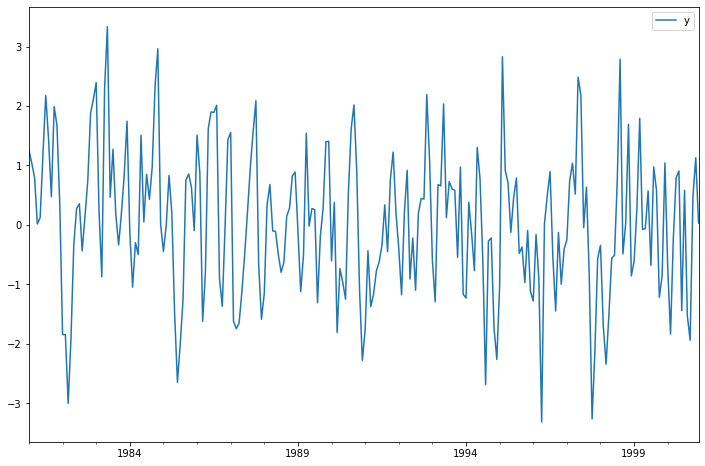

In [6]:
y.plot(figsize=(12,8))


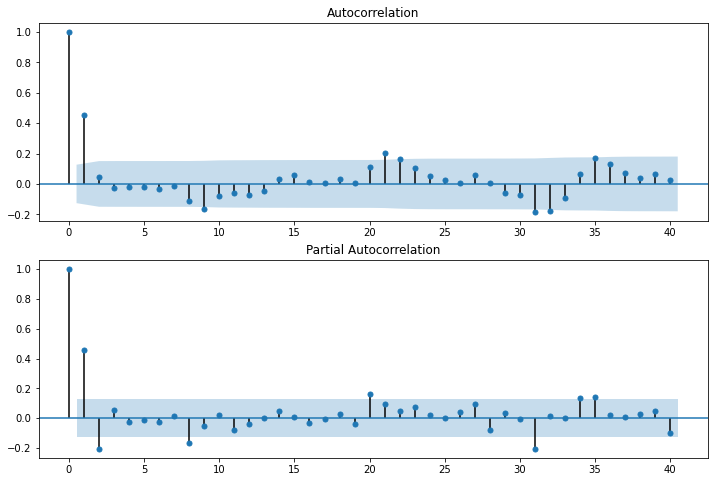

In [7]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax2)

In [8]:
# r,q,p = sm.tsa.acf(y.values.squeeze(), fft=True, qstat=True)
# data = np.c_[range(1,41), r[1:], q, p]
# table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
# print(table.set_index('lag'))

In [9]:
# Generar el modelo
model = sm.tsa.SARIMAX(y, order=(2,0,0), trend=None)

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -355.982
Date:                Sun, 09 Aug 2020   AIC                            717.965
Time:                        22:18:54   BIC                            728.406
Sample:                    01-31-1981   HQIC                           722.172
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5454      0.062      8.733      0.000       0.423       0.668
ar.L2         -0.2018      0.067     -3.017      0.003      -0.333      -0.071
sigma2         1.1358      0.112     10.130      0.0

In [10]:
# Evaluando los residuos estimados

In [11]:
sm.stats.durbin_watson(results.resid.values)

1.9838399394626456

In [12]:
resid = results.resid

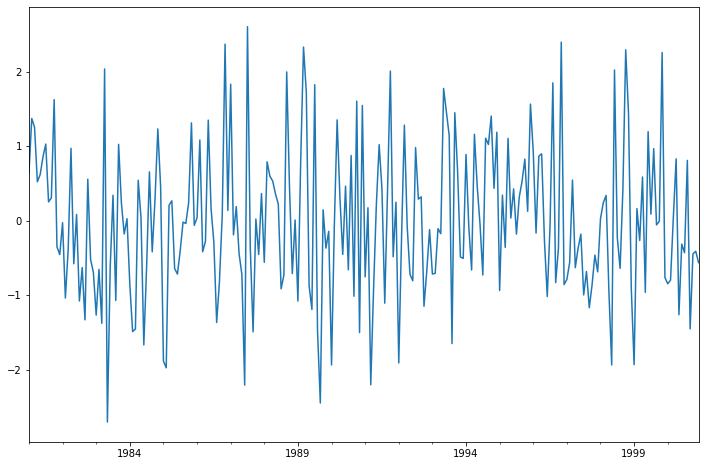

In [13]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
ax = resid.plot(ax=ax)

In [14]:
stats.normaltest(results.resid)

NormaltestResult(statistic=1.5048705078398183, pvalue=0.47121761978137355)

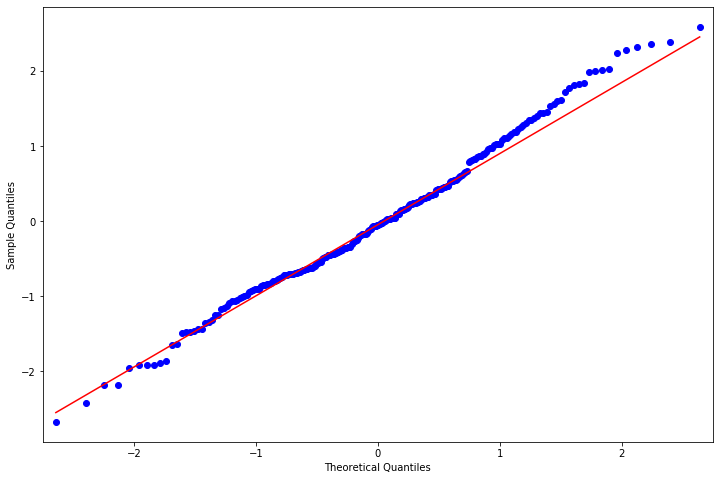

In [15]:
# qqplot displays a quantile-quantile plot of the quantiles of the sample data x 
# versus the theoretical quantile values from a normal distribution. 
# If the distribution of x is normal, then the data plot appears linear.

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(results.resid, line='q', ax=ax, fit=True)

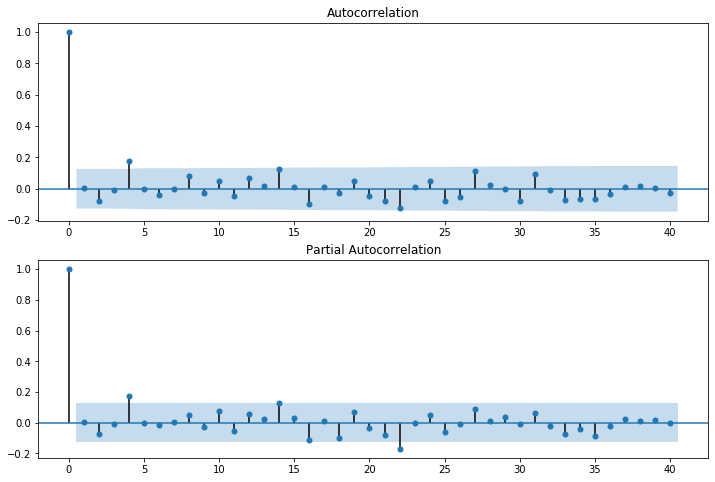

In [16]:
# ACF y PACF de los residuos

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [17]:
# r,q,p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
# data = np.c_[range(1,41), r[1:], q, p]
# table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
# print(table.set_index('lag'))

## ACF y PACF: MA(1)

Es importante conocer el ACF teórico de un proceso de MA (1), porque tendremos que comparar nuestro ACF estimado con el teórico, para evaluar si, de hecho, estamos viendo un proceso de MA (1) .
¿Cómo se correlacionan las X en diferentes rezagos entre sí? Nuestro modelo MA (1), una vez más, es

$X_t = u_t + \beta u_{t − 1}$

con $u_t \sim iidN(0,\sigma_u^2$

Es decir, los términos de error $u$ son ruido blanco, independientes entre sí. Por lo tanto,

$Cov(u_t,u_t)=Var(u_t)= \sigma_u^2$

$Cov(u_t, u_j) = E (u_t,u_j) = 0, \forall t = j$
¿Cuál es el ACF de X en el retraso 1?

In [19]:
arparams = np.array([1])
maparams = np.array([1, 0.5])

nobs = 240

u = arma_generate_sample(arparams, maparams, nobs)

In [20]:
u=pd.DataFrame(u, columns=['u'])
u.index = pd.period_range('1981-01-01', '2000-12-01', freq='M')

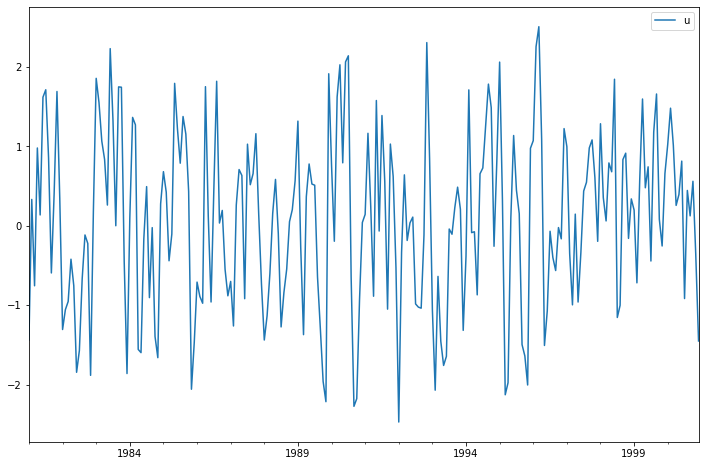

In [21]:
u.plot(figsize=(12,8))

In [23]:
# Generar el modelo
ma1 = sm.tsa.SARIMAX(u, order=(0,0,1), trend=None)

# Estimar los parametros del modelo
results_ma1 = ma1.fit()

print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                      u   No. Observations:                  240
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -332.605
Date:                Tue, 23 Jun 2020   AIC                            669.210
Time:                        17:14:11   BIC                            676.172
Sample:                    01-31-1981   HQIC                           672.015
                         - 12-31-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5080      0.059      8.562      0.000       0.392       0.624
sigma2         0.9348      0.097      9.633      0.000       0.745       1.125
Ljung-Box (Q):                       34.79   Jarque-

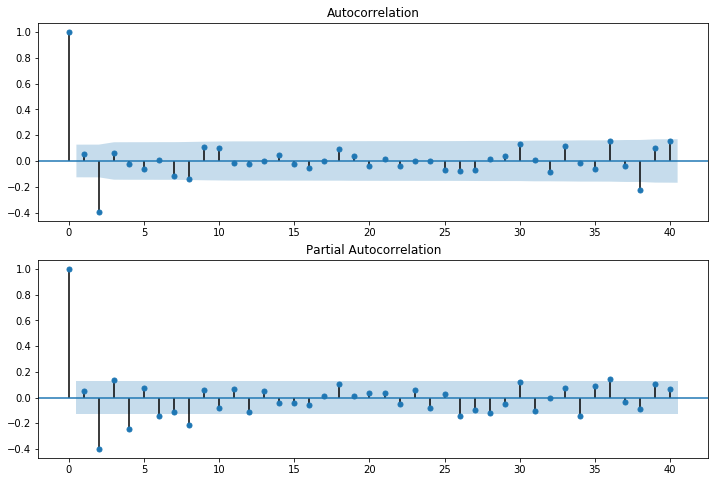

In [18]:
fig = plt.figure(figsize=(12,8))

#Plot ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(u, lags=40, ax=ax1)

#Plot PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(u, lags=40, ax=ax2)

## Resumen: ACF  y PACF teóricos


Los ACF y PACF teóricos mostrarán las siguientes características:

1) Para procesos AR (p):
- Los ACF se descomponen lentamente.
- Los PACF muestran picos en los retrasos 1 a p, con ceros después.

2) Para procesos de MA (q):
- Los ACF muestran picos en los rezagos 1 a q, con ceros después.
- Los PACF se descomponen lentamente, a menudo con oscilación.

3) Para procesos ARMA (p, q):
- Los ACF decaen lentamente.
- Los PACF se descomponen lentamente.

# Criterios de informacion

Los  "criterios de información" son utilizados de la misma manera que los economometristas anteriores compararon modelos a través de la estadística $R^2$. En pocas palabras, los criterios de información penalizan la probabilidad logarítmica por algunas razones: dependiendo del número de observaciones y el número de estadísticas estimadas. Todos los criterios de información (IC) tienen, en su base, alguna versión de la función de probabilidad. Muchos  software econométricos utilizan variaciones de las fórmulas de criterios de información. Algunos  software apuntan a maximizar la probabilidad, otros la probabilidad en logaritmo, y otros buscan minimizar el negativo de la probabilidad. Independientemente de la forma que cada programa implemente el criterio, la idea básica es la misma. Queremos una estadística que nos pueda dar una idea de qué tan bien un modelo particular se ajusta a un conjunto particular de datos. 

Tres criterios de informacion estudiamos:

- [Criterio de informaci\'on bayesiano](https://en.wikipedia.org/wiki/Akaike_information_criterion) (BIC)
- [Criterio de informaci\'on de Akaike](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (AIC)
- [Criterio de informacion de Hannan–Quinn information criterion](https://en.wikipedia.org/wiki/Hannan%E2%80%93Quinn_information_criterion) (HQIC) 

El criterio de información de Akaike $AIC = −2ln(L) + 2k$, donde $ln(L)$ es la log-verosimilitud maximizada  del modelo y k es el número de parámetros estimados. El criterio de información bayesiano $BIC = −2ln(L) + kln(N)$, donde N es el tamaño de la muestra. El criterio Hannan-Quinn es $HQIC=-2\hat{L}+2k\ln(\ln(N)$

Los dos primeros IC penalizan (−2 veces el negativo de) la función de probabilidad agregando una penalización; Esta penalización depende del número de parámetros estimados y del tamaño de la muestra. El mejor modelo (el que mejor se ajusta a los datos) es el que está asociado con la mayor probabilidad. Los mejores modelos tienen los criterios de información más pequeños. Más pequeño es mejor.

In [24]:
macrodata = sm.datasets.macrodata.load_pandas().data
macrodata.index = pd.period_range('1959Q1', '2009Q3', freq='Q')
z = macrodata['infl']
# x = np.log(macrodata['realgdp'])

In [24]:
import warnings

aic = pd.DataFrame(np.zeros((6,6), dtype=float))
bic = pd.DataFrame(np.zeros((6,6), dtype=float))
hqic = pd.DataFrame(np.zeros((6,6), dtype=float))

warnings.simplefilter('ignore')

# Iterate over all ARMA(p,q) models with p,q in [0,6]
for p in range(6):
    for q in range(6):
        if p == 0 and q == 0:
            continue

        # Estimate the model with no missing datapoints
        mod = sm.tsa.statespace.SARIMAX(z, order=(p,0,q), trend='c',enforce_invertibility=False)
        try:
            res = mod.fit(disp=False)
            aic.iloc[p,q] = res.aic
            bic.iloc[p,q] = res.bic
            hqic.iloc[p,q] = res.hqic
        except:
            aic.iloc[p,q] = np.nan
            bic.iloc[p,q] = np.nan
            hqic.iloc[p,q] = np.nan

#         # Estimate the model with missing datapoints
#         mod = sm.tsa.statespace.SARIMAX(dta_miss, order=(p,0,q), enforce_invertibility=False)
#         try:
#             res = mod.fit(disp=False)
#             aic_miss.iloc[p,q] = res.aic
#         except:
#             aic_miss.iloc[p,q] = np.nan

In [25]:
aic

,0,1,2,3,4,5
0,0.000000,1110.013748,1076.606507,1012.812548,1004.867371,988.174834
1,974.413554,922.768028,924.744947,924.799351,922.693067,923.588561
2,943.270253,924.751360,918.434347,919.564908,921.209497,922.904109
3,922.041345,923.899997,919.404872,921.427046,920.550779,922.182932
4,924.001957,921.750768,927.968054,920.990699,921.226282,923.061600
5,923.587992,925.288769,919.584888,926.268429,922.363232,925.104207


In [26]:
bic 

,0,1,2,3,4,5
0,0.000000,1116.640160,1086.546125,1026.065372,1021.433401,1008.054070
1,981.039966,932.707646,937.997771,941.365381,942.572303,946.781003
2,953.209871,938.004184,935.000377,939.444144,944.401939,949.409757
3,935.294168,940.466027,939.284108,944.619488,947.056427,952.001786
4,940.567987,941.630004,951.160496,947.496347,951.045136,956.193660
5,943.467228,948.481211,946.090536,956.087283,955.495292,961.549473


In [27]:
hqic

,0,1,2,3,4,5
0,0.000000,1112.694530,1080.627679,1018.174111,1011.569326,996.217179
1,977.094336,926.789201,930.106510,931.501305,930.735412,932.971297
2,947.291425,930.112923,925.136301,927.607253,930.592233,933.627235
3,927.402908,930.601952,927.447217,930.809781,931.273905,934.246449
4,930.703911,929.793113,937.350790,931.713825,933.289799,936.465509
5,931.630337,934.671505,930.308014,938.331947,935.767140,939.848506


# Validacion cruzada[2](#Notas)

Un caso de uso común es validar de forma cruzada los métodos de pronóstico realizando pronósticos h-step-ahead de forma recursiva mediante el siguiente proceso:

- Ajustar parámetros del modelo en una muestra de entrenamiento

- Producir pronósticos h-step-ahead desde el final de esa muestra

- Compare los pronósticos con el conjunto de datos de prueba para calcular la tasa de error

- Expanda la muestra para incluir la siguiente observación y repita

Los economistas a veces llaman a esto un ejercicio de evaluación de pronóstico pseudo fuera de la muestra, o validación cruzada de series de tiempo.

## Primera iteraccion

In [34]:
# Paso 1: Definir el training data
training_obs = int(len(z) * 0.8)

training_z = z[:training_obs]
training_mod = sm.tsa.SARIMAX(training_z, order=(2, 0, 2), trend=None)
training_res = training_mod.fit()


print(training_res.params)

ar.L1     1.418947
ar.L2    -0.438786
ma.L1    -1.108180
ma.L2     0.475416
sigma2    3.991000
dtype: float64


In [37]:
# Paso 2:Realizar pronostico
fcast = training_res.forecast(steps=1)

# print(fcast)

# Paso 3: Calcular el error de pronostico 
true = z.reindex(fcast.index)
error = true - fcast

print(pd.concat([true.rename('true'),
                 fcast.rename('forecast'),
                 error.rename('error')], axis=1))

        true  forecast     error
1999Q3  3.35  2.293215  1.056785


## Segunda iteraccion

In [39]:
# Paso 1: unir una nueva observacion a la muestra y re estimar los parametros
append_res = training_res.append(z[training_obs:training_obs + 1], refit=True)

print(append_res.params)

ar.L1     1.418985
ar.L2    -0.438823
ma.L1    -1.108917
ma.L2     0.477542
sigma2    3.973249
dtype: float64


In [40]:
# Paso 2: producir one-step-ahead forecasts
fcast = append_res.forecast(steps=1)

# Paso 3: Calcular el error de pronostico 
true = z.reindex(fcast.index)
error = true - fcast

print(pd.concat([true.rename('true'),
                 fcast.rename('forecast'),
                 error.rename('error')], axis=1))

        true  forecast     error
1999Q4  2.85  2.616967  0.233033


## h-iteracciones

In [48]:
# Establecer el numero de pronosticos
nforecasts = 3
forecasts = {}

# Obtener el numero de observaciones del training initial
nobs = len(z)
n_init_training = int(nobs * 0.8)

# Crear el model para estimar con la muestra del initial training sample
init_training_z = z.iloc[:n_init_training]
mod = sm.tsa.SARIMAX(training_z, order=(1, 0, 0), trend=None)
res = mod.fit()

# Guardar los pronosticos inicialest
forecasts[training_z.index[-1]] = res.forecast(steps=nforecasts)

# Realizar el procedimiento al resto de la muestra
for t in range(n_init_training, nobs):
    # Actualizar los resultados mediante el agregar una observacion adicional
    updated_z = z.iloc[t:t+1]
    res = res.append(updated_z, refit=False)

    # Guardar los nuevos resultados
    forecasts[updated_z.index[0]] = res.forecast(steps=nforecasts)

# Combinar todos los pronosticos dentro de un dataframe
forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:10, :7])
# print(forecasts)

          1999Q2    1999Q3    1999Q4    2000Q1    2000Q2    2000Q3    2000Q4
1999Q3  1.719449       NaN       NaN       NaN       NaN       NaN       NaN
1999Q4  1.539846  3.000080       NaN       NaN       NaN       NaN       NaN
2000Q1  1.379004  2.686711  2.686711       NaN       NaN       NaN       NaN
2000Q2       NaN  2.406075  2.406075  2.406075       NaN       NaN       NaN
2000Q3       NaN       NaN  2.154751  2.154751  2.154751       NaN       NaN
2000Q4       NaN       NaN       NaN  1.929680  1.929680  1.929680       NaN
2001Q1       NaN       NaN       NaN       NaN  1.728118  1.728118  1.728118
2001Q2       NaN       NaN       NaN       NaN       NaN  1.547610  1.547610
2001Q3       NaN       NaN       NaN       NaN       NaN       NaN  1.385956
2001Q4       NaN       NaN       NaN       NaN       NaN       NaN       NaN


In [49]:
# Construir los errores de pronosticos
forecast_errors = forecasts.apply(lambda column: z - column).reindex(forecasts.index)

print(forecast_errors.iloc[:10, :5])

          1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
1999Q3  1.630551       NaN       NaN       NaN       NaN
1999Q4  1.310154 -0.150080       NaN       NaN       NaN
2000Q1  2.380996  1.073289  1.073289       NaN       NaN
2000Q2       NaN  1.783925  1.783925  1.783925       NaN
2000Q3       NaN       NaN  0.615249  0.615249  0.615249
2000Q4       NaN       NaN       NaN  1.960320  1.960320
2001Q1       NaN       NaN       NaN       NaN  0.091882
2001Q2       NaN       NaN       NaN       NaN       NaN
2001Q3       NaN       NaN       NaN       NaN       NaN
2001Q4       NaN       NaN       NaN       NaN       NaN


In [34]:
# Reindex los pronosticos en funcion de los horizonte
def flatten(column):
    return column.dropna().reset_index(drop=True)

forecast_horizon = forecast_errors.apply(flatten)
forecast_horizon.index = (forecast_horizon.index + 1).rename('horizon')

print(forecast_horizon.iloc[:3, :5])

           1999Q2    1999Q3    1999Q4    2000Q1    2000Q2
horizon                                                  
1        1.630551 -0.150080  1.073289  1.783925  0.615249
2        1.310154  1.073289  1.783925  0.615249  1.960320
3        2.380996  1.783925  0.615249  1.960320  0.091882


In [35]:
# Calcular la raiz del mean square error
rmse = (forecast_horizon**2).mean(axis=1)**0.5

print(rmse)

horizon
1    3.371843
2    3.410197
3    3.464022
dtype: float64


# Referencias


- Box, G. E., & Jenkins, G. M. (1976). Time series analysis: Forecasting and control (revised ed.). Oakland: Holden-Day.

# Notas

1. Figura tomada de Levendis,J.D. 2018. Time Series Econometrics: Learning Through Replications.
2. Esta secci'on es una adaptacion de [statsmodel-crossvalidation](https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_forecasting.html?highlight=cross%20validation#Cross-validation)